In [1]:
from unstructured.partition.pdf import partition_pdf

d:\Projects\Multi_Modal_Chat_Doc\multimodal\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data Loading

In [112]:
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

In [113]:
def get_tables_base64(chunks):
    tables_b64 = []
    for chunk in chunks:
        chunk_els = chunk.metadata.orig_elements
        for el in chunk_els:
            if "Table" in str(type(el)):    
                tables_b64.append(el.metadata.text_as_html)
    return tables_b64

In [114]:
pdf_path = "high_definition_maps_avs.pdf"

elements = partition_pdf(
    filename=pdf_path,
    infer_table_structure=True,
    strategy="hi_res",
    extract_image_block_types=["Image", "Table"],
    extract_image_block_to_payload=True,
    chunking_strategy="by_title",
    max_characters=10000, #4000,
    combine_text_under_n_chars=2000,
    new_after_n_chars=6000 #3800,
)

texts, tables= [], []

print(set([str(type(el)) for el in elements]))

for element in elements:
    texts.append(element)

images = get_images_base64(elements)
tables = get_tables_base64(elements)

{"<class 'unstructured.documents.elements.CompositeElement'>"}


In [118]:
tables[6]

'<table><thead><tr><th>Methods</th><th>Accuracy</th><th>FP</th><th>FN</th><th>Precision</th><th>Recall</th><th>Fl</th></tr></thead><tbody><tr><td>SCNN [96]</td><td>0.9653</td><td>0.0617</td><td>0.018</td><td>0.7252</td><td>0.9653</td><td>0.8282</td></tr><tr><td>LaneNet [97]</td><td>0.9638</td><td>0.078</td><td>0.0244</td><td>0.7554</td><td>0.9638</td><td>0.8470</td></tr><tr><td>Line-CNN [98]</td><td>0.9687</td><td>0.0442</td><td>0.0197</td><td>N/A</td><td>N/A</td><td>N/A</td></tr><tr><td>Spatio-Tempeoral [87]</td><td>0.9804</td><td>N/A</td><td>N/A</td><td>0.8750</td><td>0.9531</td><td>0.9124</td></tr><tr><td>SALMNet [92]</td><td>0.9691</td><td>0.0263</td><td>0.0252</td><td>N/A</td><td>N/A</td><td>N/A</td></tr><tr><td>PINet [93]</td><td>0.9675</td><td>0.0310</td><td>0.0250</td><td>N/A</td><td>N/A</td><td>N/A</td></tr><tr><td>Graph-Embedded [90]</td><td>0.9637</td><td>N/A</td><td>N/A</td><td>N/A</td><td>N/A</td><td>N/A</td></tr><tr><td>Ripple-GAN [84]</td><td>N/A</td><td>0.0048</td><td>0

In [135]:
images[2]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHSAqsDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDy7w94K1Lx54w1PS9LntIZ4hLcM107KpUSBcDarHOXHb1rsf8AhnHxh/0EtD/7/wA3/wAaq38Bf+Sta7/143H/AKPir6UoA+YP+GcfGH/QS0P/AL/zf/GqP+GcfGH/AEEtD/7/AM3/AMar6fooA+YP+GcfGH/QS0P/AL/zf/G

In [120]:
st = set()
for ele in texts:
    combined_elements = ele.metadata.orig_elements
    for particular_element in combined_elements:
        st.add(str(type(particular_element)))
st

{"<class 'unstructured.documents.elements.FigureCaption'>",
 "<class 'unstructured.documents.elements.Formula'>",
 "<class 'unstructured.documents.elements.Header'>",
 "<class 'unstructured.documents.elements.Image'>",
 "<class 'unstructured.documents.elements.ListItem'>",
 "<class 'unstructured.documents.elements.NarrativeText'>",
 "<class 'unstructured.documents.elements.Table'>",
 "<class 'unstructured.documents.elements.Text'>",
 "<class 'unstructured.documents.elements.Title'>"}

In [8]:
actual_texts = []
for ele in texts:
    combined_elements = ele.metadata.orig_elements
    for particular_element in combined_elements:
        if "Text" in str(type(particular_element)):
            actual_texts.append(particular_element.text)

### Data Processing

In [174]:
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [ ]:
# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables.
Give a summary of the table and start by giving it an appropriate concise tile.

Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary with the title as it is.

Table chunk: {element}
"""
prompt = ChatPromptTemplate.from_template(prompt_text)

model = ChatGroq(temperature=0.5, model="llama-3.1-8b-instant")

summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [150]:
table_summaries = summarize_chain.batch(tables, {"max_concurrency": 3})

In [160]:
table_summaries

['**Comparison of Navigation Data Layers**\n\nThe table compares different layers of navigation data across various platforms, including TomTom, HERE, and Lanelet (Bertha Drive). The data is organized by layer number and includes information on the type of data associated with each layer, such as planning data, road DNA, and lane level mapping.',
 '**Comparison of Data Collection Methods**\n\nThe table compares three data collection methods: Crowdsourcing, Open-sourced dataset, and Self-collected dataset. Each method has its advantages, including: \n- Crowdsourcing: high efficiency, up-to-date data, and various types of environments.\n- Open-sourced dataset: high quality, timesaving, and data is organized.\n- Self-collected dataset: low cost, customizable data collection, and specific scene/environment control.',
 '**Evaluation Metrics Comparison for Road Extraction Methods**\n\nThe table compares the performance of various road extraction methods (DeepRoadMapper, Topology, LinkNet34, 

In [161]:
from langchain_openai import ChatOpenAI

prompt_template = """Describe the image in detail. Start with giving it an appropriate caption. The image can contain 
                     block diagrams, experiment analysis or plots. Just give a summary of the image starting with the caption."""
messages = [
    (
        "user",
        [
            {"type": "text", "text": prompt_template},
            {
                "type": "image_url",
                "image_url": {"url": "data:image/jpeg;base64,{image}"},
            },
        ],
    )
]

prompt = ChatPromptTemplate.from_messages(messages)

chain = prompt | ChatOpenAI(model="gpt-4o-mini") | StrOutputParser()

image_summaries = chain.batch(images)

In [162]:
image_summaries

["### Caption: Block Diagram of Vehicle Localization and Motion Planning System\n\nThe image presents a block diagram illustrating the framework for vehicle localization and motion planning. It is divided into three main sections: Localization Sensing, Environment & Perception, and Mission & Motion Planning.\n\n1. **Localization Sensing**: This section is focused on the process of determining the vehicle's position on high-definition maps. It includes three hierarchical levels:\n   - **Road Level**: Identifying the road on which the vehicle is located.\n   - **Lane Level**: Determining the specific lane the vehicle occupies.\n   - **Feature Level**: Recognizing distinct features in the environment.\n\n2. **Environment & Perception**: This component highlights the role of context modeling in interpreting data from the surrounding environment. It integrates inputs from various sensors, categorized as Environment and Vehicle Sensors.\n\n3. **Mission & Motion Planning**: This part deals wi

In [192]:
# Prompt
prompt_text = """
You are an assistant tasked with summarizing text data.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary with the text as it is.

Text chunk: {element}
"""
prompt = ChatPromptTemplate.from_template(prompt_text)
summarize_chain = {"element": lambda x: x} | prompt | ChatOpenAI(model="gpt-4o-mini") | StrOutputParser()

In [193]:
text_summaries = summarize_chain.batch(actual_texts, {"max_concurrency": 3})

### Storing the summaries with actual content

In [ ]:
import uuid
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings

In [229]:
def create_multi_vector_retriever(
    vectorstore, text_summaries, texts, table_summaries, tables, image_summaries, images   
):
    store = InMemoryStore()
    id_key = "doc_id"

    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=store,
        id_key=id_key
    )

    def add_docs(retriever, summaries, original_content):
        doc_ids = [str(uuid.uuid4()) for _ in original_content]
        summary_documents = [
            Document(page_content=s, metadata={id_key: doc_ids[i]})
            for i, s in enumerate(summaries)
        ]

        retriever.vectorstore.add_documents(summary_documents)
        retriever.docstore.mset(list(zip(doc_ids, original_content)))
    
    if text_summaries:
        add_docs(retriever, text_summaries, actual_texts)
    if table_summaries:
        add_docs(retriever, table_summaries, tables)
    if image_summaries:
        add_docs(retriever, image_summaries, images)
    
    return retriever

In [231]:
vectorstore = Chroma(
    collection_name="multimodalvectorstore", embedding_function=OpenAIEmbeddings()
)

In [232]:
multimodal_retriever = create_multi_vector_retriever(
    vectorstore,
    text_summaries,
    texts,
    table_summaries,
    tables,
    image_summaries,
    images
)

### Creating custom prompt and RAG chain

In [259]:
import io, base64
import re

from IPython.display import HTML, display
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from PIL import Image

In [260]:
from langchain_core.messages import HumanMessage

In [261]:
def plt_img_base64(img_base64):
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />' # create a html tag to display the image by taking the base 64 encoded image as input
    display(HTML(image_html))

In [262]:
# sanity check to see if the data encoded is in base 64 format or not
def check_if_base64(sb):
    return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None

# this function is used to check the first 8 bytes of data and determine if the base64 data is an image or not
def is_it_image(b64data):
    image_signatures = {
        b"\xff\xd8\xff": "jpg",
        b"\x89\x50\x4e\x47\x0d\x0a\x1a\x0a": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data)[:8]
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False

In [263]:
def resize_base64_image(base64_string, size=(128, 128)):
    img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img_data))
    resized_img = img.resize(size, Image.LANCZOS)
    buffered = io.BytesIO() # Saving the resized image to a bytes buffer
    resized_img.save(buffered, format=img.format)

    # Encoding the image to Base64 again
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

In [264]:
def parse_retrieved_docs(parsed_documents):
    b64_images = []
    texts = []
    for doc in parsed_documents:
        if isinstance(doc, Document):
            doc = doc.page_content
        if check_if_base64(doc) and is_it_image(doc):
            doc = resize_base64_image(doc, size=(1300, 600))
            b64_images.append(doc)
        else:
            texts.append(doc)
    return {"images": b64_images, "texts": texts}

In [265]:
def custom_prompt(input_data):
    content_text_combined = "\n".join(input_data["context"]["texts"])
    messages = [] # will store image data if it's being retrieved from the docs

    if input_data["context"]["images"]:
        for image in input_data["context"]["images"]:
            image_text_data = {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image}"},
            }
            messages.append(image_text_data)
    
    prompt_template = f"""
        Answer the question based only on the following context, which can include text, tables, and the below image.
        Context: {content_text_combined}
        Question: {input_data["question"]}
    """

    text_message = {
        "type": "text",
        "text": (
            prompt_template
        ),
    }

    messages.append(text_message)
    return [HumanMessage(content=messages)]

In [266]:
def rag_chain_for_multi_modal(retriever):
    chain = (
        {
            "context": retriever | RunnableLambda(parse_retrieved_docs),
            "question": RunnablePassthrough(),
        }
        | RunnableLambda(custom_prompt)
        | ChatOpenAI(model="gpt-4o-mini")
        | StrOutputParser()
    )

    return chain

In [269]:
def rag_chain_for_multi_modal_with_sources(retriever):
    chain_with_sources = {
            "context": retriever | RunnableLambda(parse_retrieved_docs),
            "question": RunnablePassthrough(),
        } | RunnablePassthrough().assign(
            response = (RunnableLambda(custom_prompt)
            | ChatOpenAI(model="gpt-4o-mini")
            | StrOutputParser()
        )
    )

    return chain_with_sources

### Testing the chroma retriever

In [267]:
chain_multimodal_rag = rag_chain_for_multi_modal(multimodal_retriever)

In [247]:
query = "What methods have been studied in this paper?"
retrieved_documents = multimodal_retriever.invoke(query, limit=6)

In [256]:
len(retrieved_documents)

4

In [249]:
query2 = "Summarize the Road Network Extraction Methods"
retrieved_documents2 = multimodal_retriever.invoke(query2, limit=6)

In [250]:
len(retrieved_documents2)

4

In [253]:
query3 = "Explain Vehicle Localization and Motion Planning System in short"
retrieved_documents3 = multimodal_retriever.invoke(query3, limit=6)

In [254]:
retrieved_documents3

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHNBYsDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3ngA44z3rn9Y8YaXo7FJZt0o42KaTxlrLaNockiHEknyqfQ14rI8ksjPLIzuxyWPWuzC4X22rMKtblPSj8V7UOQulXTr/AHgy4/nSf8LYtR/zDLr/AL6WvNSPSjoOld39nw6HL9afQ9K/4Wza/wDQLuv++lpf+Fs2n/QLuv


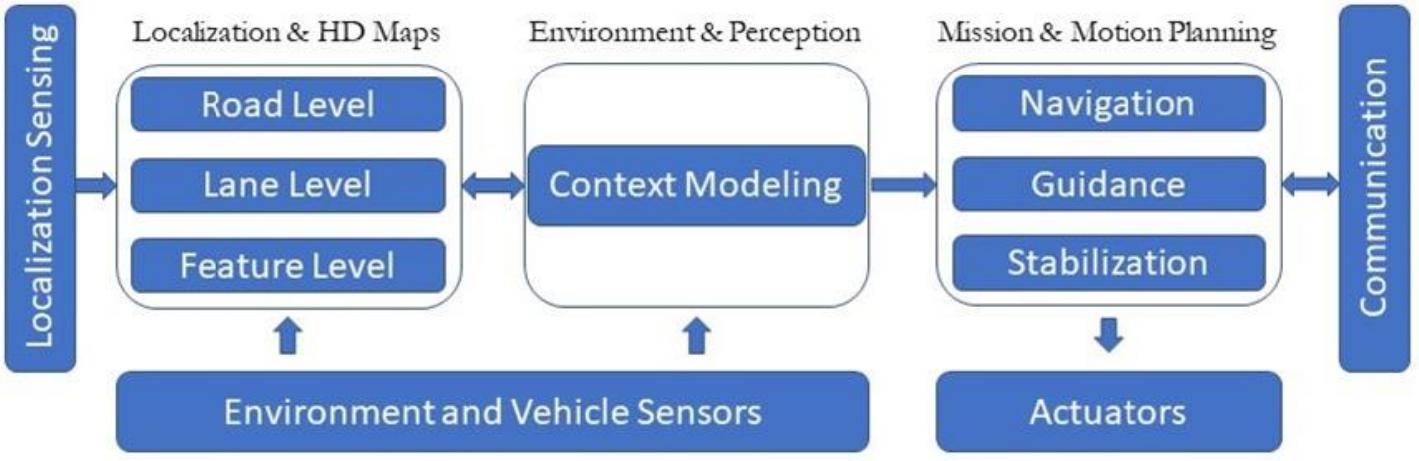

In [255]:
plt_img_base64(retrieved_documents3[0])

### Testing the RAG chain response

In [268]:
chain_multimodal_rag.invoke(query3)

"The Vehicle Localization and Motion Planning System relies on accurate mapping and sensor data fusion to enable a vehicle to determine its position and navigate effectively. Initially, sensor data from sources like 3D laser sensors, IMUs, GPS, and odometry are combined to create a detailed HD map, which includes roadway features and environmental elements.\n\nThe localization process identifies the ego vehicle's location within the generated map with centimeter-level accuracy, utilizing lane and road information. This is complemented by context modeling that processes real-time environmental data to assist in perception.\n\nFor motion planning, the system includes navigation, guidance, and stabilization functions that ensure the vehicle follows its planned route while adapting to dynamic surroundings. The integration of HD maps with real-time perceptions ensures safe and efficient movement. Overall, the system is designed to facilitate precise maneuvering and decision-making in autono

In [270]:
chain_multimodal_rag_with_sources = rag_chain_for_multi_modal_with_sources(multimodal_retriever)

In [271]:
response = chain_multimodal_rag_with_sources.invoke(query3)

In [272]:
response

{'context': {'images': ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAJYBRQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3nAAIXqaztR1yx0sF7q4Cj0z0puv6omkaRNdnqg+Ueprw6/1C41S5a4nd8sSducYrpw+HdXUyqVeU9ZHxI8NklRffMP8AZNL/AMLH8O/8/v8A47XjZUY24H5UeWnoK7HgLHN9ZPZR8R/Dv/P

In [273]:
print(response["response"])

The Vehicle Localization and Motion Planning System integrates several components to enable precise navigation and maneuvering of autonomous vehicles. 

1. **Localization**: This involves collecting and fusing sensor data (such as from LIDAR, IMU, GPS, and odometry) to create high-definition (HD) maps. The HD maps provide detailed geometric information about the environment, including roads, lanes, and other important features. The system uses this map data to accurately determine the vehicle's position within a few centimeters.

2. **Environment & Perception**: This module continuously gathers real-time information about the surroundings, including detecting obstacles and dynamic objects. It uses context modeling to understand and interpret the environment, which aids in the decision-making process.

3. **Mission & Motion Planning**: Based on the localization and environmental data, the planning system determines the optimal path for the vehicle, incorporating navigation, guidance, an

Retrieved Context:
Once initial sensor data is collected, it is usually fused and sorted to generate the initial map, mainly used for accurate localization. Initial mapping is primarily generated using a 3D laser sensor; however, it can be fused with other sensors such as IMU [9]–[11], GPS [12], odometry [13] and visual odometry [14] for more accurate state estimation in the HD map. INS and GPS sensors provide orientation and position information that updates the mapping location within cm-accuracy. These point cloud maps have been highly accurate and later assist the ground vehicle in precise maneuver and localization at centimeter-level in the 3D space. Later, a vector map is created from the PCL map after the point cloud registration is obtained from the mapping. Point cloud registration is called a multi-step process (shown in the Fig. 3) of aligning several overlapped point clouds to generate a detailed and accurate map. The vector map holds information related to the lane, sidewa


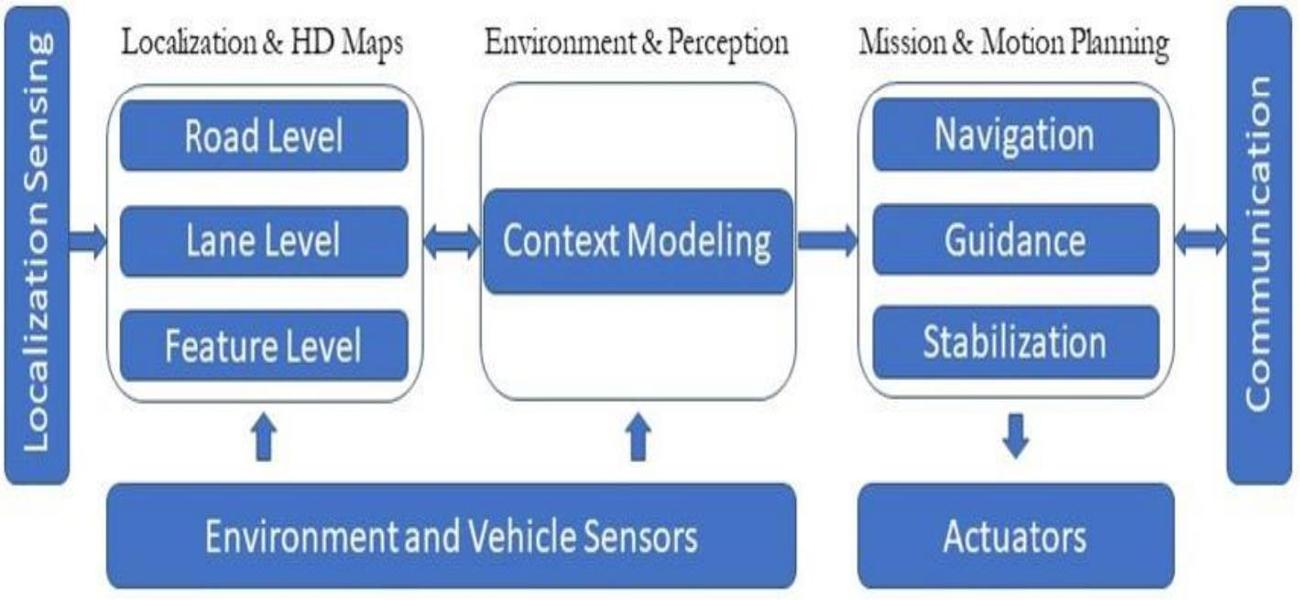

In [277]:
print("Retrieved Context:")
for text in response['context']['texts']:
    print(text)
for image in response['context']['images']:
    plt_img_base64(image)